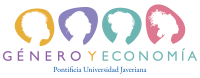

# **Sesión 3: Introducción a Geopandas**

---

Autor: Andrés Felipe Díaz Rodríguez. Asistente de investigación Proyecto Género y Economía (https://generoyeconomia.org).

---

**Contenido de la sesión:**

**Parte 1**
*  ¿Qué es Matplotlib?
1. Ejemplos de gráficas básicas
2. Exportar una gráfica
3. Graficar datos a partir de un DataFrame
4. Personalización de gráficas

**Parte 2**
1. Introducción a GeoPandas
2. Shapely y operaciones geométricas
3. Marco Geoestadístico Nacional (MGN) y Divipola
4. Shapefiles
5. Censo Nacional de Población y vivienda
6. Visualización geográfica de la población que requiere cuidado en Colombia

Nota: El material relacionado con esta sesión se encuentra en la página del curso: https://generoyeconomia.github.io/python_economia_cuidado/index.html, en la sección Módulo 3.

## **¿Qué es Matplotlib?**

Matplotlib es una librería de Python que permite crear y exportar visualizaciones estáticas, animadas e interactivas.

## **Sintaxis básica**
```python
fig, ax = plt.subplots()             # Crea la gráfica y un objeto `ax`
    <Código de la gráfica>           # Acá va el código que define la vizualiación
plt.show()                           # Muestra la gráfica
```

In [ ]:
!pip install matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## **1. Ejemplos de gráficas básicas**

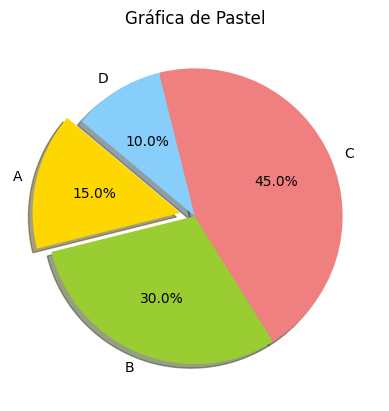

In [ ]:
# @title Gráfico de pastel
labels = ['A', 'B', 'C', 'D']
sizes = [15, 30, 45, 10]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # 'Explota' el primer segmento

fig, ax = plt.subplots()

ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax.set_title('Gráfica de Pastel')

plt.show()

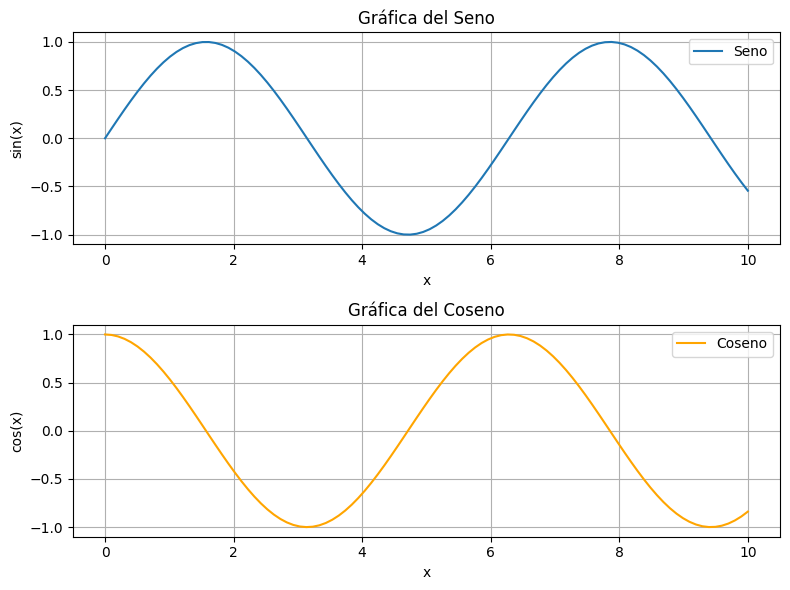

In [ ]:
# @title También se pueden hacer gráficas más complejas
# Datos para las gráficas
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Crear una figura y dos subgráficas (axes)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Primera subgráfica
ax1.plot(x, y1, label='Seno')
ax1.set_title('Gráfica del Seno')
ax1.set_xlabel('x')
ax1.set_ylabel('sin(x)')
ax1.legend()
ax1.grid(True)

# Segunda subgráfica
ax2.plot(x, y2, label='Coseno', color='orange')
ax2.set_title('Gráfica del Coseno')
ax2.set_xlabel('x')
ax2.set_ylabel('cos(x)')
ax2.legend()
ax2.grid(True)

# Ajustar el espacio entre las subgráficas
fig.tight_layout()

# Mostrar la figura
plt.show()

**Compartan en el chat:** ¿Qué tipo de gráficas han usado?

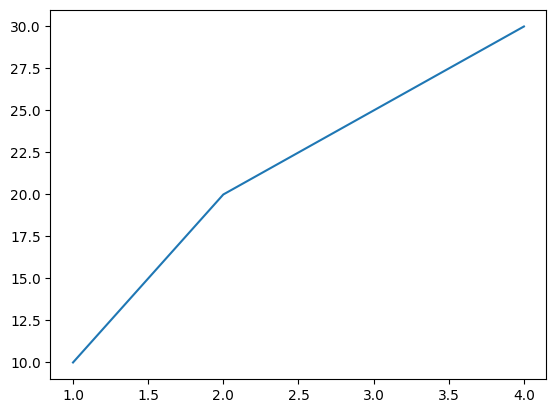

In [ ]:
# Datos
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

# Crea el objeto de Eje
fig, ax = plt.subplots()

# Crear la gráfica
ax.plot(x, y)

# Mostrar la gráfica
plt.show()

## **2. Exportar una gráfica**

De la misma manera que podemos exportar una gráfica como una imagen en cualquier formato que necesitemos (`.png`, `.jpeg`, `.pdf`, etc...)

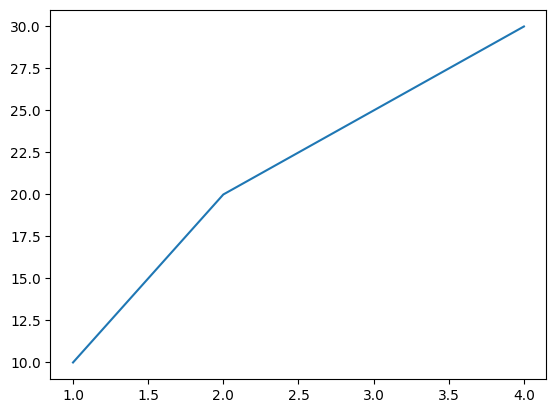

In [ ]:
# Datos
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

# Crea el objeto de Eje
fig, ax = plt.subplots()

# Crear la gráfica
ax.plot(x, y)

# Guardar la imagen en la ubicación especificada
plt.savefig('mi_grafica.png')
plt.savefig('mi_grafica.pdf')

# Mostrar la gráfica
plt.show()

## **3. Graficar datos a partir de un DataFrame**

A partir de un DataFrame de pandas podemos hacer todo tipo de visualizaciones. El primer paso es cargar la base de datos y para este ejemplo vamos a utlilizar la tabla del ejercicio final del cuaderno de pandas.

In [2]:
# Datos
horas_hogar = {
    'Familia': ['Familia1', 'Familia1', 'Familia1', 'Familia2', 'Familia2',
                'Familia3', 'Familia3', 'Familia3', 'Familia3', 'Familia4',
                'Familia4', 'Familia4', 'Familia5', 'Familia5', 'Familia5'],
    'Persona': [1, 2, 3, 1, 2, 1, 2, 3, 4, 1, 2, 3, 1, 2, 3],
    'Género': ['Hombre', 'Mujer', 'Hombre', 'Hombre',
               'Mujer', 'Hombre', 'Mujer', 'Hombre',
               'Mujer', 'Hombre', 'Mujer', 'Hombre',
               'Mujer', 'Hombre', 'Mujer'],
    'Edad': [40, 38, 12, 45, 42, 50, 48, 15, 13, 35, 34, 10, 60, 58, 18],
    'Horas_Trabajo_Hogar': [5, 15, 2, 6, 14, 4, 18, 1, 3, 8, 12, 5, 2, 15, 1]
}

# Crear el DataFrame
horas_hogar_df = pd.DataFrame(horas_hogar)

# Mostrar el DataFrame
horas_hogar_df

,Familia,Persona,Género,Edad,Horas_Trabajo_Hogar
0,Familia1,1,Hombre,40,5
1,Familia1,2,Mujer,38,15
2,Familia1,3,Hombre,12,2
3,Familia2,1,Hombre,45,6
4,Familia2,2,Mujer,42,14
5,Familia3,1,Hombre,50,4
6,Familia3,2,Mujer,48,18
7,Familia3,3,Hombre,15,1
8,Familia3,4,Mujer,13,3
9,Familia4,1,Hombre,35,8


Un DataFrame tiene el módulo `.plot()` el cual, si no se especifica nada más, grafica líneas para todas las columnas numéricas del DataFrame.

Es necesario utilizar el argumento `ax` y darle como valor el objeto que creamos cuando definimos la gráfica.

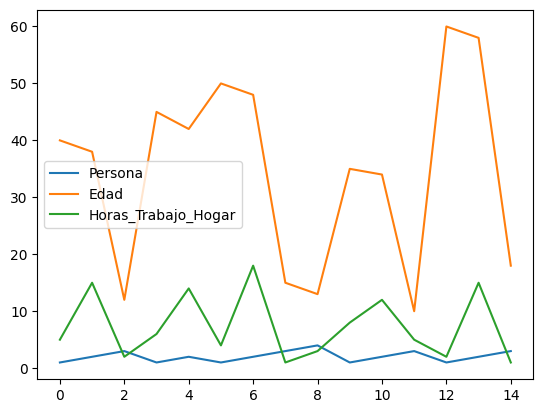

In [3]:
fig, ax = plt.subplots()

horas_hogar_df.plot(ax=ax)

plt.show()

Se pueden hacer gráficas más específicas definiendo el tipo de gráfica y limitando qué columna queremos graficar. Por ejemplo, acá hacemos un histograma que muestra la distribución de la edad de las personas de la tabla.

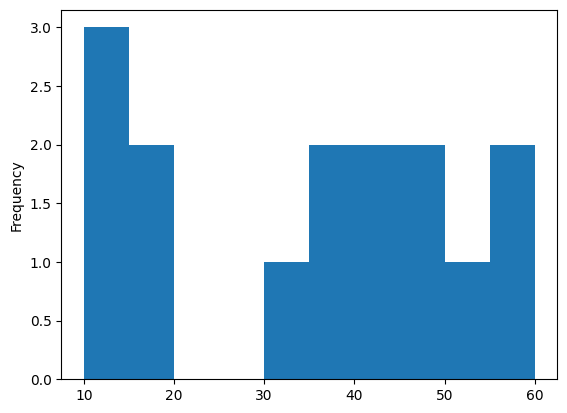

In [4]:
fig, ax = plt.subplots()

horas_hogar_df["Edad"].plot(kind="hist",ax=ax)

plt.show()

Podemos combinar `.plot()` con `.gropuby()` para hacer gráficas de datos resumidos. La siguiente gráfica muestra el promedio de horas trabajadas en el hogar por familia.

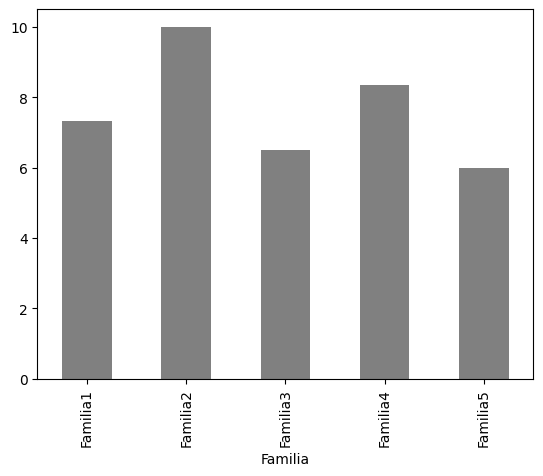

In [5]:
fig, ax = plt.subplots()

horas_hogar_df.groupby("Familia")["Horas_Trabajo_Hogar"].agg("mean").plot(kind="bar",ax=ax,color="grey")

plt.show()

## **4. Personalización de gráficas**

Las gráficas que hemos visto hasta ahora han sido muy sencillas y utilizan solamente las funcionalidades predefinidas en los objetos de pandas. Sin embargo, es posible personalizar las gráficas para que se vean exactamente como queramos.

Podemos definir el título, los nombres, rótulos y etiquetas de los ejes, así como los colores, tamaño y estilo de todos los objetos que presentemos en las gráficas.

A continuación, vamos a hacer una gráfica de dispersión entre la edad y las horas de trabajo en el hogar de las personas de la tabla.

In [6]:
# Definimos los datos que vamos a graficar. 'x' son los datos horizontales y 'y' son los verticales
x = horas_hogar_df.loc[horas_hogar_df["Edad"]>=18,"Edad"]
y = horas_hogar_df.loc[horas_hogar_df["Edad"]>=18,"Horas_Trabajo_Hogar"]

In [7]:
x

0     40
1     38
3     45
4     42
5     50
6     48
9     35
10    34
12    60
13    58
14    18
Name: Edad, dtype: int64

In [8]:
y

0      5
1     15
3      6
4     14
5      4
6     18
9      8
10    12
12     2
13    15
14     1
Name: Horas_Trabajo_Hogar, dtype: int64

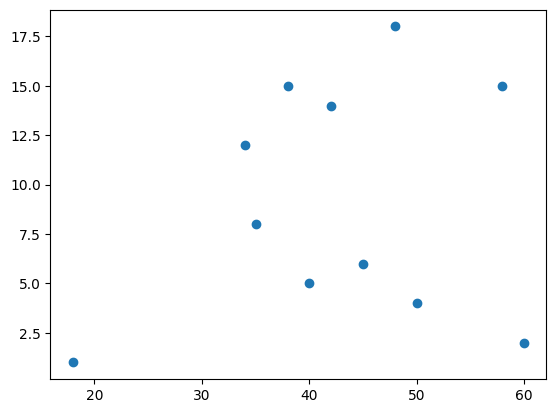

In [9]:
# Creamos la gráfica
fig, ax = plt.subplots()

# Creamos el gráfico de dispersión
ax.scatter(x,y)

# Mostramos la gráfica
plt.show()

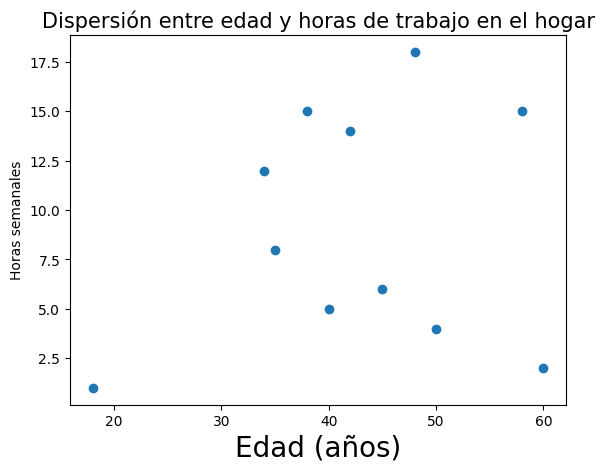

In [10]:
# Definimos los datos que vamos a graficar. 'x' son los datos horizontales y 'y' son los verticales
x = horas_hogar_df.loc[horas_hogar_df["Edad"]>=18,"Edad"]
y = horas_hogar_df.loc[horas_hogar_df["Edad"]>=18,"Horas_Trabajo_Hogar"]

# Creamos la gráfica
fig, ax = plt.subplots()

# Creamos el gráfico de dispersión
ax.scatter(x,y)

# Definimos el título de la gráfica
ax.set_title("Dispersión entre edad y horas de trabajo en el hogar",size=15)

# Definimos el nombre de los ejes
ax.set_xlabel("Edad (años)",size=20)
ax.set_ylabel("Horas semanales",size=10)

# Mostramos la gráfica
plt.show()

### **Colores**

El manejo de colores es esencial para mostrar gráficas efectivas y visualmente atractivas. Muchos de los colores que podemos usar tienen nombres en Matplotlib y podemos encontrarlos [documentación oficial](https://matplotlib.org/stable/gallery/color/named_colors.html).

Vamos a hacer un gráfico de dispersión que muestre una diferencia en color y forma según el género de cada persona.

Hombre
Hombre se muestran con color seagreen y forma D
Mujer
Mujer se muestran con color firebrick y forma P


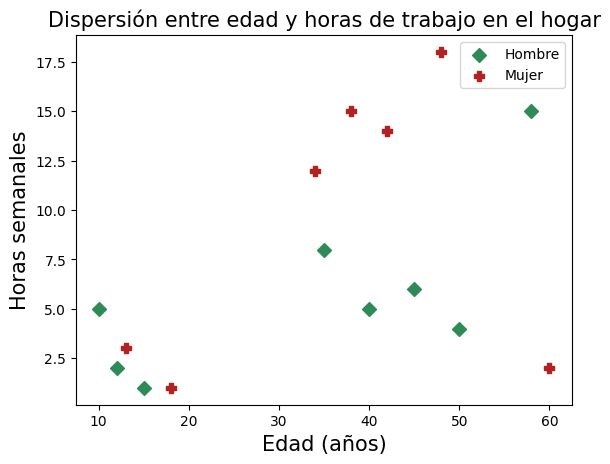

In [17]:
fig, ax = plt.subplots()

for g in horas_hogar_df["Género"].unique() :
    indicador = horas_hogar_df["Género"] == g

    x = horas_hogar_df.loc[indicador,"Edad"]
    y = horas_hogar_df.loc[indicador,"Horas_Trabajo_Hogar"]

    if g == "Hombre" :
        color = "seagreen"
        forma = "D"
    elif g == "Mujer" :
        color = "firebrick"
        forma = "P"

    print(f"{g} se muestran con color {color} y forma {forma}")
    ax.scatter(x,y,c=color,marker=forma,s=50,label=g)

ax.legend()

ax.set_title("Dispersión entre edad y horas de trabajo en el hogar",size=15)

ax.set_xlabel("Edad (años)",size=15)
ax.set_ylabel("Horas semanales",size=15)

plt.show()

**Ejercicio:** Agreguen a la gráfica anterior una línea horizontal que marque el **promedio de las horas trabajadas semanalmente por hombres y por mujeres**.
* Calculen los valores y guardarlos en algún objeto
* Busquen cómo se dibujan líneas en Matplotlib
* Personalizen las líneas para que visualmente se vean asociadas a los puntos


In [ ]:
# Solución

## **1. Introducción a Geopandas**

GeoPandas es una librería que tiene com objetivo utilizar datos geoespaiciales en Python. Combina objetos de Pandas con información espacial y permite hacer operaciones en datos de tipo geométrico.

#### **GIS**

Un sistema de información geográfica (GIS por sus siglas en inglés) es un sistema informático para capturar, almacenar, comprobar y mostrar datos relacionados con posiciones en la superficie terrestre. Los GIS pueden mostrar muchos tipos diferentes de datos en un mapa, como calles, edificios y vegetación. Esto permite a las personas ver, analizar y comprender más fácilmente patrones y relaciones.

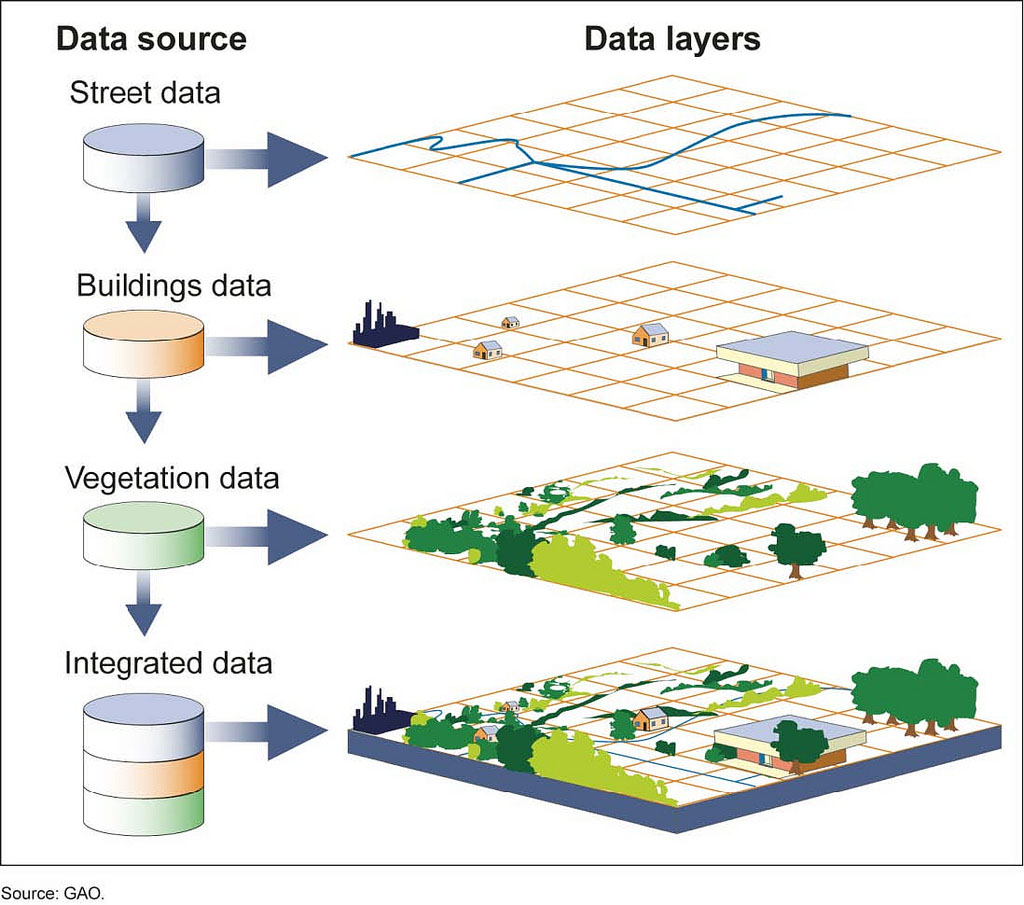

## **2. Shapely y operaciones geométricas**

GeoPandas se basa en la definición de objetos geométrico y operaciones sobre estos para poder visualizar y trabajar con información espacial. La librería **Shapely** es la que se encarga de realizar estas operaciones.

Shapely añade un tipo de datos llamado `Geometry` y define las siguientes estructuras geométricas básicas:

1. **Point**: Un punto en el espacio representado por una coordenada `x` y `y`.
2. **LineString**: una línea compuesta de uno o mas segmentos.
3. LinearRing: una geometría compuesta de una o más líenas que forman un circuito cerrado.
4. **Polygon**: un polígono que representa un área en el espacio demarcada por un LinearRing.
5. MultiPoint: colección de uno o más puntos.
6. MultiLineString: colección de uno o más LineStrings.
7. **MultiPolygon**: colección de uno o más Polygons.
8. GeometryCollection: una colección de una o más geometrías que pueden ser de distintos tipos.

Las geometrías `Point`, `LineString`, `Polygon` y `MultiPolygon` son las que principalmente utilizará GeoPandas. A continuación exploraremos cómo se definen estos objetos y algunas de las operaciones que reciben.

### **Visualización de geometrías**

POINT (-1.2 1.1)


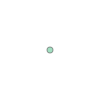

In [ ]:
# Point recibe un par de números que definen sus coordenadas
from shapely import Point
punto = Point(-1.2, 1.1)
print(punto)
punto

LINESTRING (0 0, 1 2, 1 -1.5)


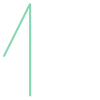

In [ ]:
# Linestring recibe una lista de coordenadas que serán unidas por una línea
from shapely import LineString
líneas = LineString([(0, 0), (1, 2), (1,-1.5)])
print(líneas)
líneas

POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))


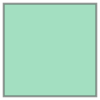

In [18]:
# Polygon recibe una serie de coordenadas que definen los vértices del polígono
from shapely import Polygon
polígono = Polygon(((0., 0.), (0., 1.), (1., 1.), (1., 0.), (0., 0.)))
print(polígono)
polígono

POLYGON ((0 0, 0 2, 1 1, 2 2, 2 0, 1 0.8, 0 0))


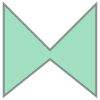

In [19]:
polígono = Polygon([(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 0.8), (0, 0)])
print(polígono)
polígono

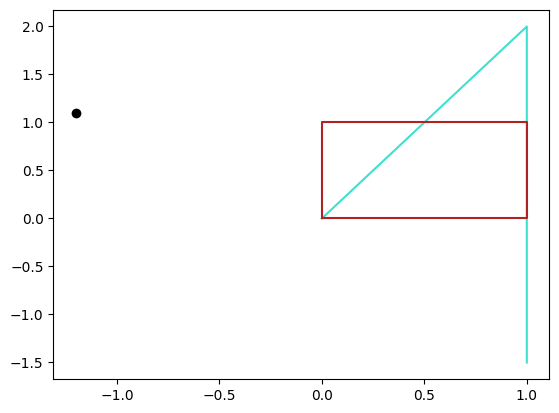

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

x,y = punto.xy
ax.scatter(x,y,c="black")

x,y = líneas.xy
ax.plot(x,y,c="turquoise")

x,y = polígono.exterior.xy
ax.plot(x,y,c="firebrick")

plt.show()

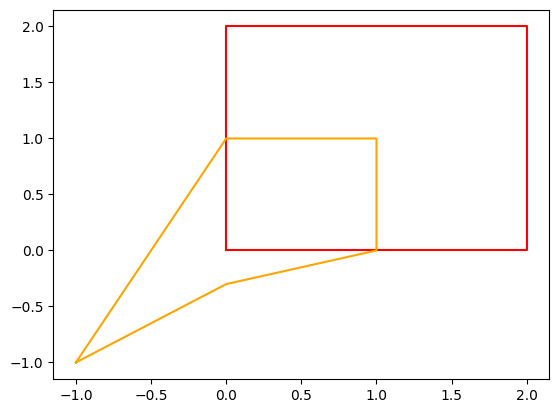

In [ ]:
p1 = Polygon(((0., 0.), (0., 2.), (2., 2.), (2., 0.), (0., 0.)))
p2 = Polygon(((-1., -1.), (0., 1.), (1., 1.), (1., 0.), (0., -0.3)))

fig,ax = plt.subplots()

x,y = p1.exterior.xy
ax.plot(x,y,c="red")

x,y = p2.exterior.xy
ax.plot(x,y,c="orange")

plt.show()

## **3. Marco Geoestadístico Nacional (MGN) y Divipola**

<cite>Es un sistema constituido por la División Político Administrativa (departamentos, municipios) y áreas geoestadísticas (cabeceras municipales, centros poblados, resto rural, entre otras), delimitadas principalmente por accidentes naturales y culturales, identificables en terreno, que contiene para cada área geoestadística variables sociodemográficas.</cite> ([DANE, 2018](https://geoportal.dane.gov.co/descargas/descarga_mgn/220207-MGN2018press.pdf))


<cite>El MGN está constituido por áreas geoestadísticas (departamentos, municipios, cabeceras municipales, centros poblados, rural disperso, entre otras)...Comprende: 1101 municipios del país, 20 áreas no municipalizadas y la isla de San Andrés.</cite> ([DANE, 2018](https://www.dane.gov.co/files/sen/lineamientos/manual-uso-marco-geoestadistico-nacional-en-proceso-estadistico.pdf))

**Toda la información geoestadística de Colombia está regida y es publicada por el DANE.**

**[Geovisor del MGN](https://geoportal.dane.gov.co/geovisores/territorio/mgn-marco-geoestadistico-nacional/)**

#### **Divipola**
La codificación de la División Político Administrativa (Divipola) es un número que identifica de manera única a todos los municipios y departamentos de Colombia. Un municipio tiene un código de 5 dígitos donde los primeros 2 indican el departamento y los últimos 3 el municipio. Estos son algunos ejemplos:

* El código de Antioquia es "05" y el código del municipio de Amalfi es "031" por lo que el Divipola completo es "**05031**"
* El código del Valle del Cauca es "76" y el código de Tuluá es "834", de modo que el Divipola de Tuluá es "**76834**"

Generalmente, las capitales de los departamentos tienen el código "001" pero no para Cundinamarca ya que es un departamento sin capital (el código "25001" corresponde a Agua de Dios, Cundinamarca).

**Ejercicio**: ¿Cuál es el código Divipola del municipio donde viven? ¿y el del municipio donde nacieron?

Buscando en google se pueden encontrar muchas fuentes de información que contienen la codificación del Divipola en distintos formatos.

## **4. Shapefiles**


### **¿Qué son?**

Un shapefile es un **formato de archivo geoespacial** popularizado por Esri, utilizado principalmente para almacenar datos vectoriales, como puntos, líneas y polígonos. Es ampliamente utilizado en Sistemas de Información Geográfica (GIS) para representar características geográficas.

Un shapefile consta de varios archivos, pero los tres más importantes son:

* **.shp**: almacena la geometría de las entidades geográficas.
* **.shx**: contiene un índice de la geometría.
* **.dbf**: almacena los atributos de las entidades en un formato de base de datos.

### **¿Cómo se obtienen?**

Dado que el DANE es el ente oficial que distribuye el material cartográfico, su geoportal tiene un sitio de descarga de los shapefiles del país: [Descargas geoportal DANE](https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/datos-geoestadisticos/?cod=111)

**Ejercicio**: Descarguen los archivos a nivel departamental y municipal y cárguenlos en el entorno de colab.

In [ ]:
# ¿Cómo descomprimir el archivo para poder acceder a sus contenidos?
!unzip MGN2023_DPTO_POLITICO.zip -d MGN2023_DPTO_POLITICO

Archive:  MGN2023_DPTO_POLITICO.zip
  inflating: MGN2023_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.cpg  
  inflating: MGN2023_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.dbf  
  inflating: MGN2023_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.prj  
  inflating: MGN2023_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.sbn  
  inflating: MGN2023_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.sbx  
  inflating: MGN2023_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.shp  
  inflating: MGN2023_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.shp.xml  
  inflating: MGN2023_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.shx  


### **¿Cómo se utilizan en Python?**
Geopandas puede leer los archivos que componen el shapefile desde una ruta especificada.

In [ ]:
import os
import geopandas as gpd

In [ ]:
# Con os.listdir() podemos ver los archivos que componen un shapefile
os.listdir("MGN2023_DPTO_POLITICO")

['MGN_ADM_DPTO_POLITICO.dbf',
 'MGN_ADM_DPTO_POLITICO.shp',
 'MGN_ADM_DPTO_POLITICO.sbx',
 'MGN_ADM_DPTO_POLITICO.sbn',
 'MGN_ADM_DPTO_POLITICO.shx',
 'MGN_ADM_DPTO_POLITICO.shp.xml',
 'MGN_ADM_DPTO_POLITICO.prj',
 'MGN_ADM_DPTO_POLITICO.cpg']

In [ ]:
# Ruta al archivo Shapefile
ruta_shapefile = "MGN2023_DPTO_POLITICO"

# Cargar el archivo Shapefile
gdf = gpd.read_file(ruta_shapefile)

In [ ]:
# Obtener información sobre el GeoDataFrame
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dpto_ccdgo  33 non-null     object  
 1   dpto_cnmbr  33 non-null     object  
 2   dpto_ano_c  33 non-null     int64   
 3   dpto_act_a  33 non-null     object  
 4   dpto_narea  33 non-null     float64 
 5   dpto_nano   33 non-null     int64   
 6   shape_Leng  33 non-null     float64 
 7   shape_Area  33 non-null     float64 
 8   geometry    33 non-null     geometry
dtypes: float64(3), geometry(1), int64(2), object(3)
memory usage: 2.4+ KB


In [ ]:
# Visualizar algunas filas del GeoDataFrame
gdf.sample(6)

,dpto_ccdgo,dpto_cnmbr,dpto_ano_c,dpto_act_a,dpto_narea,dpto_nano,shape_Leng,shape_Area,geometry
32,99,VICHADA,1991,5 de Julio Constitucion Politica de 1991,100063.370595,2023,17.292613,8.100680,"POLYGON ((-67.80972 6.32432, -67.80946 6.32432..."
5,17,CALDAS,1905,11 de Abril de 1905,7425.220161,2023,6.664502,0.605498,"POLYGON ((-74.67154 5.77147, -74.67054 5.76896..."
25,85,CASANARE,1991,5 de Julio Constitucion Politica de 1991,44394.235851,2023,12.132763,3.615063,"POLYGON ((-72.33885 6.34471, -72.33920 6.34454..."
0,05,ANTIOQUIA,1886,Constitucion Politica de 1886,62807.004377,2023,21.492797,5.135103,"POLYGON ((-76.41355 8.87383, -76.40465 8.85195..."
23,76,VALLE DEL CAUCA,1910,Decreto No 340 de 16 de Abril de 1910,20665.581324,2023,12.656823,1.679490,"MULTIPOLYGON (((-77.23810 4.04049, -77.23774 4..."
12,41,HUILA,1905,Ley 46 de 1905,18141.660549,2023,10.335565,1.474219,"POLYGON ((-74.51853 3.83600, -74.51750 3.83592..."


<Axes: >

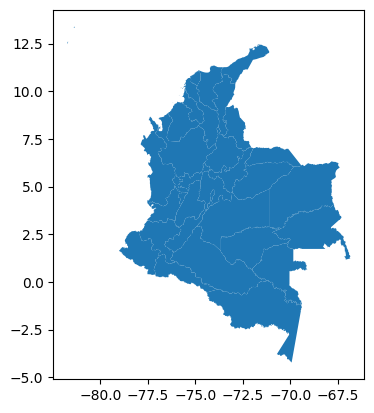

In [ ]:
# Visualizar la geometría de los datos
gdf.plot()

<Axes: >

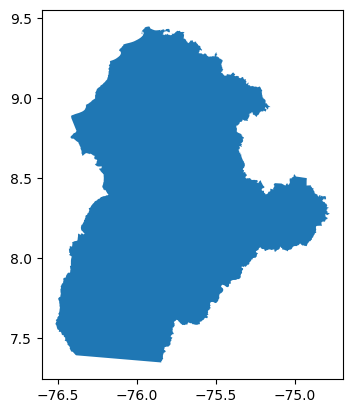

In [ ]:
# Podemos filtrarlo igual que cualquier DataFrame
gdf.loc[gdf["dpto_ccdgo"]=="23"].plot()

Podemos añadir color a cada geometría según el valor de una columna con el parámetro **column**

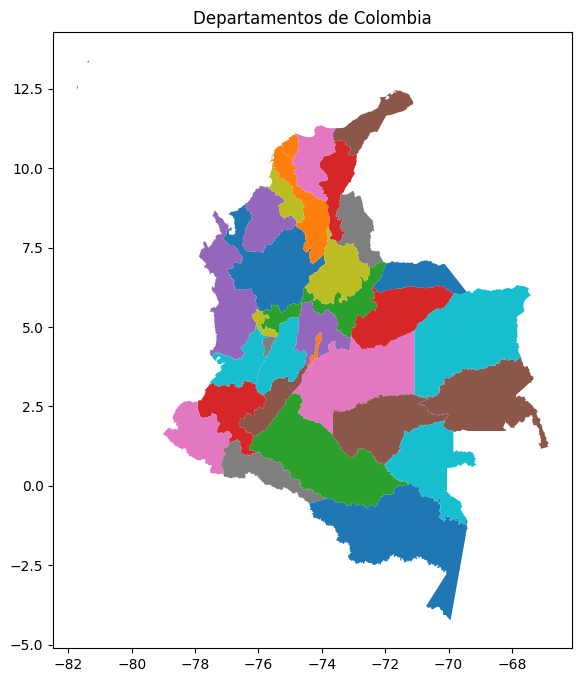

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))

gdf.plot(ax=ax,column="dpto_cnmbr")
ax.set_title("Departamentos de Colombia")

plt.show()

También puede ser según una variable numérica

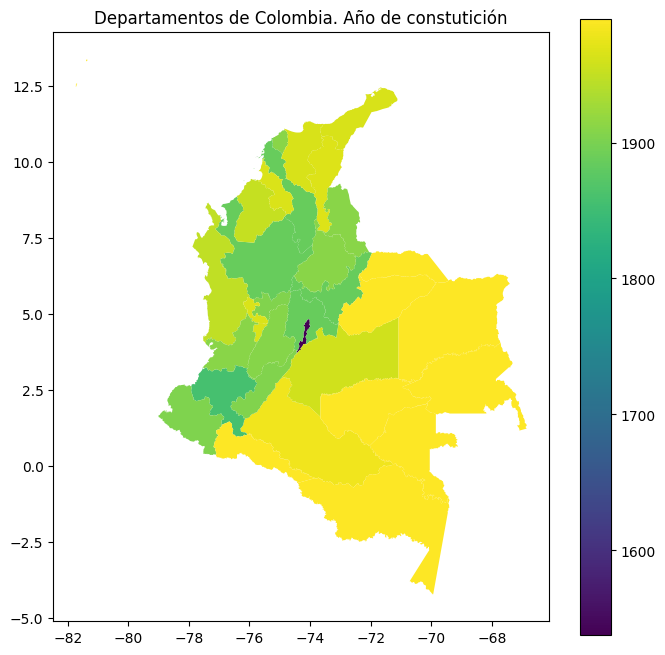

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))

gdf.plot(ax=ax,column="dpto_ano_c",legend=True)
ax.set_title("Departamentos de Colombia. Año de constutición")

plt.show()

Dado que la fecha de fundación de Bogotá es mucho antes que la de los demás departamentos, podemos filtrarlo para ver mejor la del resto del país.

Aprovechemos para eliminar las marcas en los ejes ya que en este caso no nos dan nada de información.

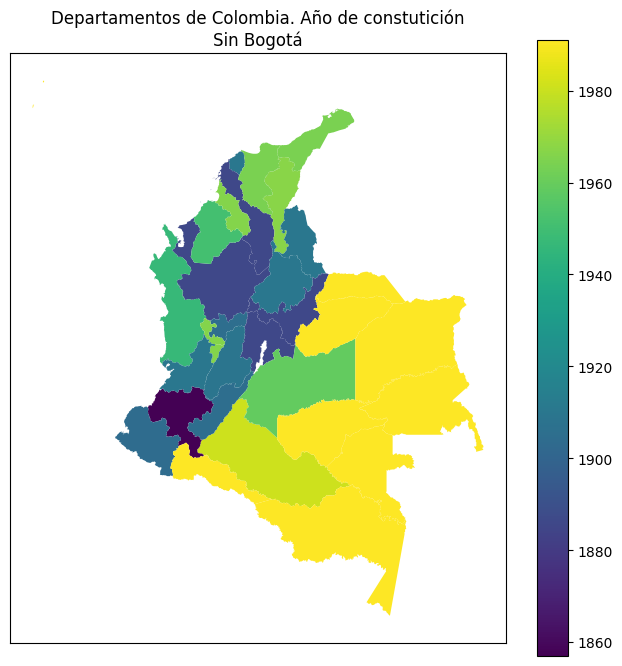

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))

gdf.loc[gdf["dpto_ccdgo"]!="11"].plot(ax=ax,column="dpto_ano_c",legend=True)
ax.set_title("Departamentos de Colombia. Año de constutición\nSin Bogotá")

ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

Dado que la isla de San Andrés queda retirada del resto del país y es muy pequeña, resulta más práctico a veces no graficarlo de la misma forma que la parte continental de Colombia.

**Ejercicio**: filtren `gdf` para que no se incluya San Andrés (ni Bogotá). Recuerden buscar el código Divipola del departamento.

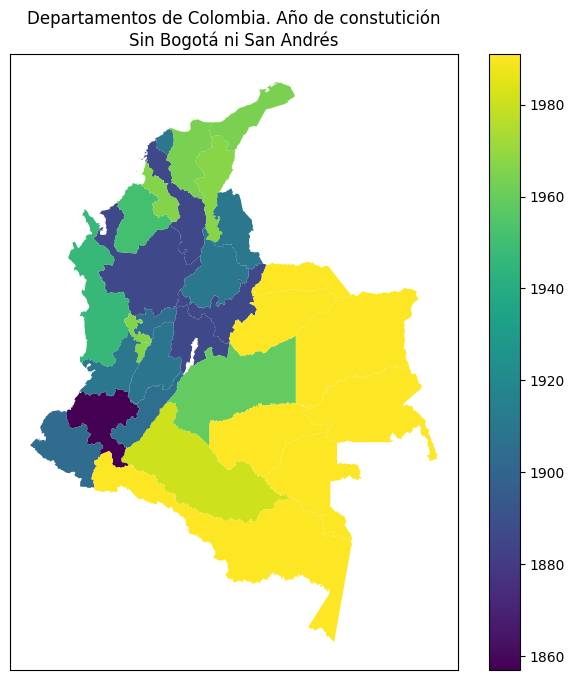

In [ ]:
# Solución

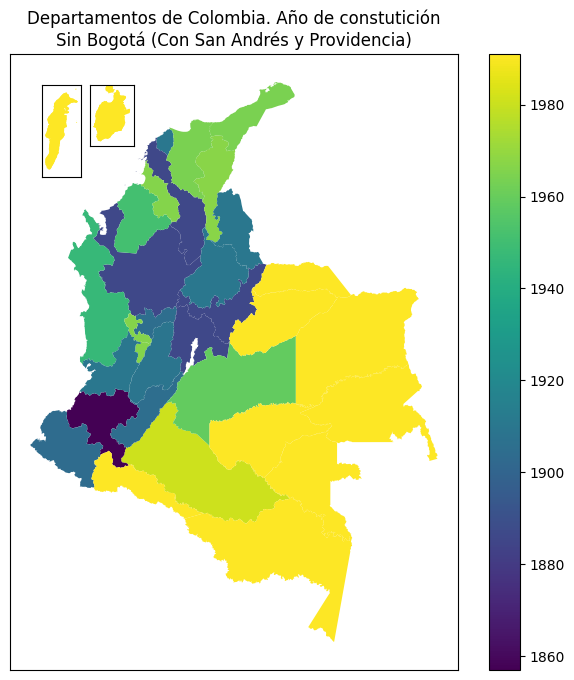

In [ ]:
import pandas as pd

san_andres_poly = gdf.loc[gdf["dpto_ccdgo"]=="88","geometry"].iloc[0]
san_andres_poly = [x for i,x in enumerate(list(san_andres_poly.geoms)) if i in [2,4]]
san_andres_poly_df = [{'dpto_ccdgo': f'88_aux_{i}','dpto_cnmbr': 'SAN ANDRÉS','geometry': p} for i,p in enumerate(san_andres_poly)]
san_andres_gdf = pd.concat([gdf.copy(),gpd.GeoDataFrame.from_dict(san_andres_poly_df,crs=4686)])
san_andres_gdf.loc[san_andres_gdf["dpto_ccdgo"].str.contains("88_aux"),"dpto_ano_c"] = gdf.loc[gdf["dpto_ccdgo"]=="88","dpto_ano_c"].iloc[0]

fig,ax = plt.subplots(figsize=(8,8))

gdf.loc[(gdf["dpto_ccdgo"]!="11")&(gdf["dpto_ccdgo"]!="88")].plot(ax=ax,column="dpto_ano_c",legend=True,)

ax.set_title("Departamentos de Colombia. Año de constutición\nSin Bogotá (Con San Andrés y Providencia)")

ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_xticks([])

inset_ax0 = ax.inset_axes([-0.01,0.8,0.25,0.15],xticklabels=[], yticklabels=[],xticks=[],yticks=[])
san_andres_gdf.plot(ax=inset_ax0,column="dpto_ano_c")
x0,y0,x1,y1  = san_andres_gdf.loc[san_andres_gdf["dpto_ccdgo"]=="88_aux_0"].total_bounds
margin_x = ((x1-x0)*0.1)
margin_y = ((y1-y0)*0.1)
inset_ax0.set_xlim((x0-margin_x,x1+margin_x))
inset_ax0.set_ylim((y0-margin_y,y1+margin_y))

inset_ax1 = ax.inset_axes([0.127,0.85,0.2,0.1],xticklabels=[], yticklabels=[],xticks=[],yticks=[])
san_andres_gdf.plot(ax=inset_ax1,column='dpto_ano_c')
x0,y0,x1,y1  = san_andres_gdf.loc[san_andres_gdf["dpto_ccdgo"]=="88_aux_1"].total_bounds
margin_x = ((x1-x0)*0.1)
margin_y = ((y1-y0)*0.1)
inset_ax1.set_xlim((x0-margin_x,x1+margin_x))
inset_ax1.set_ylim((y0-margin_y,y1+margin_y))

plt.show()

## **5. Censo Nacional de Población y Vivienda**
Con base en los microdatos del Censo Nacional de Población y Vivienda del 2018 podemos hacer una visualización del tejido demográfico de Colombia.

[Obtener los microdatos](https://microdatos.dane.gov.co/index.php/catalog/643/get-microdata). Estos archivos están a nivel de municipio, por lo que requieren cierto preprocesamiento para agregarlos. Acá descargaremos un archivo que preparamos donde están juntos todos los municipios.

In [ ]:
# Descarga el archivo con lo smicrodatos del censo
!gdown --id 1rcAryLQQslZI9a1jFjtbCQ2XkJKE2Wdi

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rcAryLQQslZI9a1jFjtbCQ2XkJKE2Wdi
To: /content/agregado_censo_2018.csv
100% 9.35M/9.35M [00:00<00:00, 144MB/s]


In [ ]:
import pandas as pd
per_df = pd.read_csv("agregado_censo_2018.csv")

**Variables a utilizar**
* **U_DPTO**: código de dos dígitos del departamento.
* **U_MPIO**: código de tres dígitos del municipio.
* **UA_CLASE**: clase de la población (1: Cabecera Municipal, 2: Centro Poblado, 3**: Rural Disperso).
* **P_SEXO**: sexo de la persona (1: Hombre, 2: Mujer).
* **PA1_GRP_ETNIC**: grupo étnico al que pertenece la persona (1: Indígena, 2: Gitano(a) o Rrom, 3: Raizal del Archipielago de San Andrés, Providencia y Santa Catalina, 4: Palenquero(a) de San Basilio, 5: Negro(a), Mulato(a), Afrodescendiente, Afrocolombiano(a), 6: Ningún grupo étnico).
* **P_EDADR**: grupo de edad de cada persona. No es la edad exacta, sino que está agrupada en franjas de 5 años (de 0 a 4, de 5 a 9, de 10 a 14, etc...)
* **CONDICION_FISICA**: indica si la persona tiene alguna dificultad física en su vida diaria (1: Sí, 2: No)
* **N**: cantidad de personas que representa cada observación.

In [ ]:
per_df.sample(5)

,U_DPTO,U_MPIO,UA_CLASE,P_SEXO,PA1_GRP_ETNIC,P_EDADR,CONDICION_FISICA,N
379750,76,606,1,1,6,11,1.0,43
109459,17,616,2,2,9,6,2.0,1
183493,25,320,1,1,6,11,1.0,21
164400,23,580,1,1,1,17,2.0,2
249576,47,675,3,2,6,9,2.0,6


In [ ]:
print(f'Hay {per_df["N"].sum()} personas en la base de datos del censo')

Hay 44164417 personas en la base de datos del censo


Para este ejercicio vamos a identificar cuántas personas están dentro de la población que requiere cuidado en Colombia. Para esto podemos hacer varias agrupaciones:
1. Edad: personas menores de 15 y mayores de 60 años.
2. Condifión física: personas que respondieron que cuentan con dificultades físicas en su vida diaria.

In [ ]:
# Separamos las edades según las categorías de la variable P_EDADR
per_df["grupos_edad"] = pd.cut(
    x=per_df["P_EDADR"],
    bins=[0,3,12,22],
    labels=["0-14","15-59","60+"],
    right=True
)
per_df["grupos_edad"].value_counts().sort_index()

grupos_edad
0-14      66370
15-59    215963
60+      132401
Name: count, dtype: int64

In [ ]:
per_df["CONDICION_FISICA"].value_counts(dropna=False)

CONDICION_FISICA
2.0    247497
1.0    146643
NaN     20594
Name: count, dtype: int64

In [ ]:
per_df["CONDICION_FISICA"].fillna(9,inplace=True)
per_df["CONDICION_FISICA"] = per_df["CONDICION_FISICA"].astype(int)
per_df["CONDICION_FISICA"].value_counts(dropna=False)

In [ ]:
dict_censo_2018 = {
    'UA_CLASE': {
        '1': 'Cabecera Municipal',
        '2': 'Centro Poblado',
        '3': 'Rural Disperso',
        '4': 'Resto Rural'
    },
    'P_SEXO': {
        '1': 'Hombre',
        '2': 'Mujer'
    },
    'CONDICION_FISICA': {
        '1': 'SI',
        '2': 'NO',
        '9': 'NA'
    },
    'P_EDADR': {
        '1': 'de 00 A 04 Años','2': 'de 05 A 09 Años','3': 'de 10 A 14 Años',
        '4': 'de 15 A 19 Años','5': 'de 20 A 24 Años','6': 'de 25 A 29 Años',
        '7': 'de 30 A 34 Años','8': 'de 35 A 39 Años','9': 'de 40 A 44 Años',
        '10': 'de 45 A 49 Años','11': 'de 50 A 54 Años','12': 'de 55 A 59 Años',
        '13': 'de 60 A 64 Años','14': 'de 65 A 69 Años','15': 'de 70 A 74 Años',
        '16': 'de 75 A 79 Años','17': 'de 80 A 84 Años','18': 'de 85 A 89 Años',
        '19': 'de 90 A 94 Años','20': 'de 95 A 99 Años','21': 'de 100 y más Años'
        }
}

In [ ]:
for k,v in dict_censo_2018.items() :
    if k not in per_df :
        continue
    per_df[f"{k}_lab"] = per_df[k].astype(str).map(v)

per_df["divipola"] = (per_df["U_DPTO"]*1000) + per_df["U_MPIO"]

In [ ]:
per_df.sample(5)

,U_DPTO,U_MPIO,UA_CLASE,P_SEXO,PA1_GRP_ETNIC,P_EDADR,CONDICION_FISICA,N,grupos_edad,UA_CLASE_lab,P_SEXO_lab,CONDICION_FISICA_lab,P_EDADR_lab,divipola
68100,13,490,3,2,5,4,2,2,15-59,Rural Disperso,Mujer,NO,de 15 A 19 Años,13490
247417,47,545,2,2,5,8,2,1,15-59,Centro Poblado,Mujer,NO,de 35 A 39 Años,47545
40905,5,790,2,2,9,9,2,1,15-59,Centro Poblado,Mujer,NO,de 40 A 44 Años,5790
56408,8,832,3,2,5,14,1,1,60+,Rural Disperso,Mujer,SI,de 65 A 69 Años,8832
392427,85,230,3,2,1,2,2,96,0-14,Rural Disperso,Mujer,NO,de 05 A 09 Años,85230


En el material suplementario del curso que se encuentra en la página web pueden encontrar cómo se puede crear una gráfica como la siguiente:

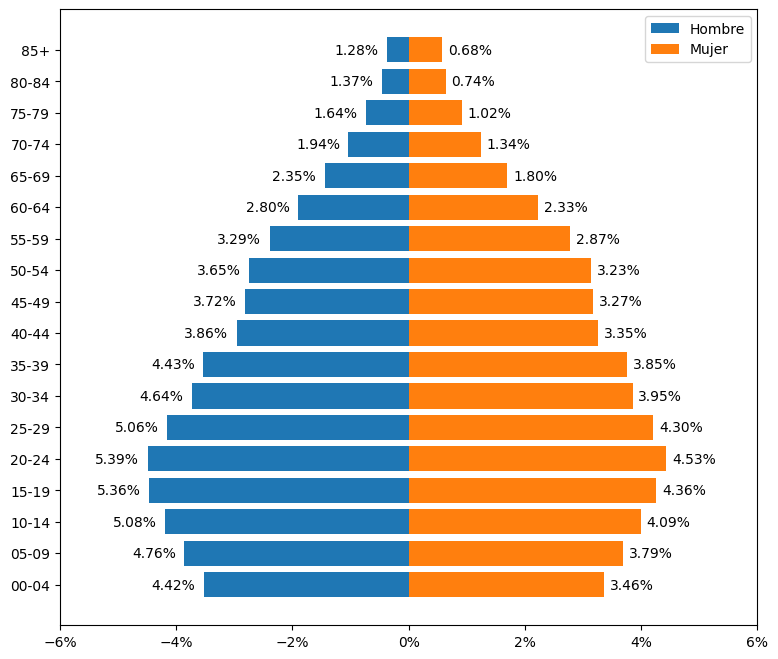

## **6. Visualización geográfica de la población que requiere cuidado en Colombia**


In [ ]:
!unzip MGN2023_MPIO_POLITICO.zip -d shape_municipios

Archive:  MGN2023_MPIO_POLITICO.zip
  inflating: shape_municipios/MGN_ADM_MPIO_GRAFICO.cpg  
  inflating: shape_municipios/MGN_ADM_MPIO_GRAFICO.dbf  
  inflating: shape_municipios/MGN_ADM_MPIO_GRAFICO.prj  
  inflating: shape_municipios/MGN_ADM_MPIO_GRAFICO.sbn  
  inflating: shape_municipios/MGN_ADM_MPIO_GRAFICO.sbx  
  inflating: shape_municipios/MGN_ADM_MPIO_GRAFICO.shp  
  inflating: shape_municipios/MGN_ADM_MPIO_GRAFICO.shp.xml  
  inflating: shape_municipios/MGN_ADM_MPIO_GRAFICO.shx  


In [ ]:
mpio_gdf = gpd.read_file("shape_municipios")

In [ ]:
mpio_gdf.sample(5)

,dpto_ccdgo,mpio_ccdgo,mpio_cdpmp,dpto_cnmbr,mpio_cnmbr,mpio_crslc,mpio_tipo,mpio_narea,mpio_nano,shape_Leng,shape_Area,geometry
390,19,622,19622,CAUCA,ROSAS,1844,MUNICIPIO,169.091744,2023,0.715264,0.013717,"POLYGON ((-76.79744 2.31893, -76.79739 2.31887..."
216,15,189,15189,BOYACÁ,CIÉNEGA,1817,MUNICIPIO,53.992422,2023,0.385304,0.004405,"POLYGON ((-73.30704 5.43985, -73.30714 5.43969..."
209,15,162,15162,BOYACÁ,CERINZA,1782,MUNICIPIO,63.578582,2023,0.334001,0.005191,"POLYGON ((-72.96767 6.01097, -72.96764 6.01028..."
483,25,269,25269,CUNDINAMARCA,FACATATIVÁ,1600,MUNICIPIO,157.995539,2023,0.674149,0.012880,"POLYGON ((-74.34742 4.89538, -74.34732 4.89537..."
95,05,664,05664,ANTIOQUIA,SAN PEDRO DE LOS MILAGROS,1813,MUNICIPIO,220.923896,2023,0.830308,0.018048,"POLYGON ((-75.55784 6.52558, -75.55640 6.52467..."


In [ ]:
mpio_gdf.dtypes

dpto_ccdgo      object
mpio_ccdgo      object
mpio_cdpmp      object
dpto_cnmbr      object
mpio_cnmbr      object
mpio_crslc      object
mpio_tipo       object
mpio_narea     float64
mpio_nano        int64
shape_Leng     float64
shape_Area     float64
geometry      geometry
dtype: object

In [ ]:
mpio_gdf["divipola"] = mpio_gdf["mpio_cdpmp"].astype(int)

Vamos a agrupar por municipio la cantidad total de personas y la cantidad total de personas que requieren cuidado (menores a 15 y mayores a 60 años y que tienen alguna dificultad física).

Lo primero es utilizar los datos del censo para calcular el total de estas categorías a nivel municipal:

In [ ]:
censo_municipio = per_df.groupby("divipola")["N"].sum().reset_index()
censo_municipio

,divipola,N
0,5001,2372330
1,5002,17599
2,5004,2159
3,5021,3839
4,5030,26821
...,...,...
1117,97889,756
1118,99001,19788
1119,99524,9690
1120,99624,4026


In [ ]:
# Calculemos cuántas personas son menores a 15 y mayores a 60 en cada municipio
mun_edad_cuidado = per_df.loc[~per_df["grupos_edad"].isin(["15-59"])].groupby("divipola")["N"].agg("sum").reset_index()
mun_edad_cuidado.columns = ["divipola","N_edad_cuidado"]

In [ ]:
censo_municipio = censo_municipio.merge(
    mun_edad_cuidado,
    on="divipola",
    how="left",
    validate="1:1"
)
censo_municipio.sample(10)

,divipola,N,N_edad_cuidado
768,52687,16653,6198
541,25740,32803,11223
960,73026,6712,2737
57,5353,4950,1925
765,52678,23727,8152
980,73352,10057,4385
393,19701,5045,2004
894,68425,2130,913
804,54518,45521,15626
1108,95001,48086,17486


**Ejercicio**: creen una nueva columna donde esté el número de personas que tienen alguna dificultad física y llámenla `N_dificultad`.

In [ ]:
# Solución

Ahora hay que pegar `censo_municipio` al GeoDataFrame a nivel municipal para tener la información geográfica.

In [ ]:
mpio_gdf_cuidado = mpio_gdf.merge(
    censo_municipio,
    on="divipola",
    how="left",
    validate="1:1"
)

In [ ]:
mpio_gdf_cuidado.sample(5)

,dpto_ccdgo,mpio_ccdgo,mpio_cdpmp,dpto_cnmbr,mpio_cnmbr,mpio_crslc,mpio_tipo,mpio_narea,mpio_nano,shape_Leng,shape_Area,geometry,divipola,N,N_edad_cuidado,N_dificultad
722,52,110,52110,NARIÑO,BUESACO,1899,MUNICIPIO,635.960833,2023,1.229231,0.051533,"POLYGON ((-77.23516 1.45240, -77.23481 1.45233...",52110,19951,7658,2898.0
1076,86,568,86568,PUTUMAYO,PUERTO ASÍS,Decreto 1951 de Octubre 24 de 1967,MUNICIPIO,2819.154777,2023,3.644402,0.228679,"POLYGON ((-76.22630 0.63889, -76.22604 0.63843...",86568,57255,20164,5546.0
431,23,090,23090,CÓRDOBA,CANALETE,Ordenanza 28 de 1978,MUNICIPIO,420.041550,2023,1.304469,0.034465,"POLYGON ((-76.19951 8.82918, -76.19919 8.82874...",23090,14831,6139,861.0
711,50,683,50683,META,SAN JUAN DE ARAMA,Ordenanza 03 de Noviembre 17 de 1966,MUNICIPIO,1167.017687,2023,2.493406,0.094959,"POLYGON ((-74.03031 3.50109, -74.03011 3.50105...",50683,8242,3089,831.0
35,05,172,05172,ANTIOQUIA,CHIGORODÓ,Ordenanza 52 del 27 de Abril de 1915,MUNICIPIO,721.682645,2023,1.610386,0.059023,"POLYGON ((-76.78970 7.75342, -76.78969 7.75340...",5172,55564,20482,3485.0


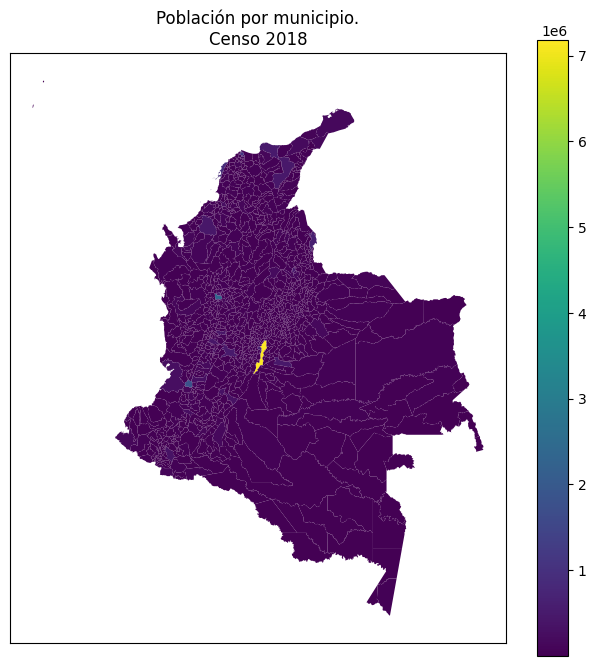

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))

mpio_gdf_cuidado.plot(ax=ax,column="N",legend=True)
ax.set_title("Población por municipio.\nCenso 2018")

ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

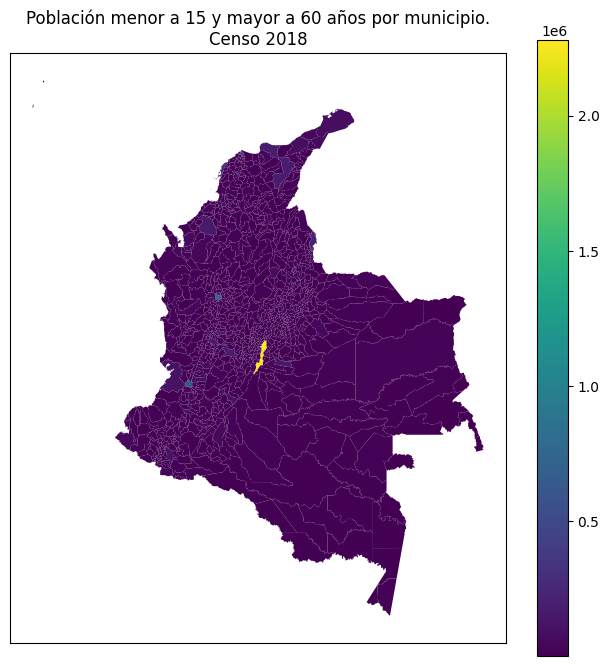

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))

mpio_gdf_cuidado.plot(ax=ax,column="N_edad_cuidado",legend=True)
ax.set_title("Población menor a 15 y mayor a 60 años por municipio.\nCenso 2018")

ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

Como podemos ver, hay tres municipios que tienen mucha población con respecto a todos los demás y sesgan la escala. Para corregir esto podemos ver la cantidad de personas que requieren cuidado *per capita*, es decir como proporción de la población total.

In [ ]:
mpio_gdf_cuidado["N_edad_cuidado_per_cap"] = mpio_gdf_cuidado["N_edad_cuidado"].div(mpio_gdf_cuidado["N"])
mpio_gdf_cuidado["N_dificultad_per_cap"] = mpio_gdf_cuidado["N_dificultad"].div(mpio_gdf_cuidado["N"])

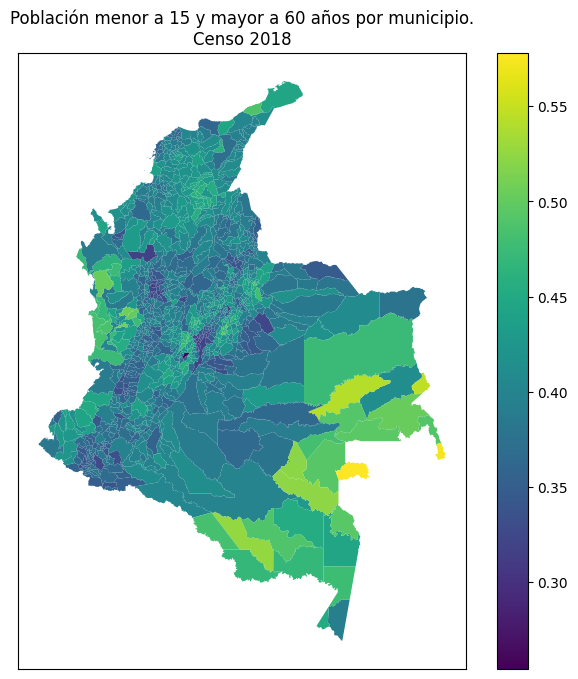

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))

mpio_gdf_cuidado.loc[mpio_gdf_cuidado["dpto_ccdgo"]!="88"].plot(ax=ax,column="N_edad_cuidado_per_cap",legend=True)
ax.set_title("Población menor a 15 y mayor a 60 años por municipio (per cápita).\nCenso 2018")

ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

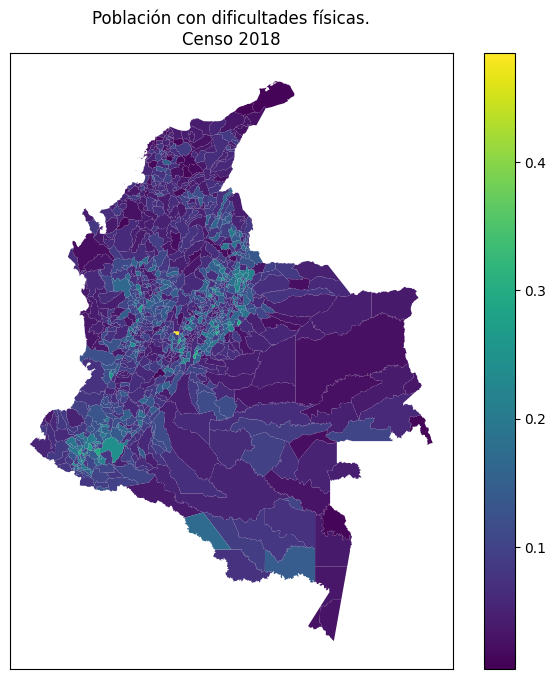

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))

mpio_gdf_cuidado.loc[mpio_gdf_cuidado["dpto_ccdgo"]!="88"].plot(ax=ax,column="N_dificultad_per_cap",legend=True)
ax.set_title("Población con dificultades físicas (per cápita).\nCenso 2018")

ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

### **Filtrar un solo departamento**

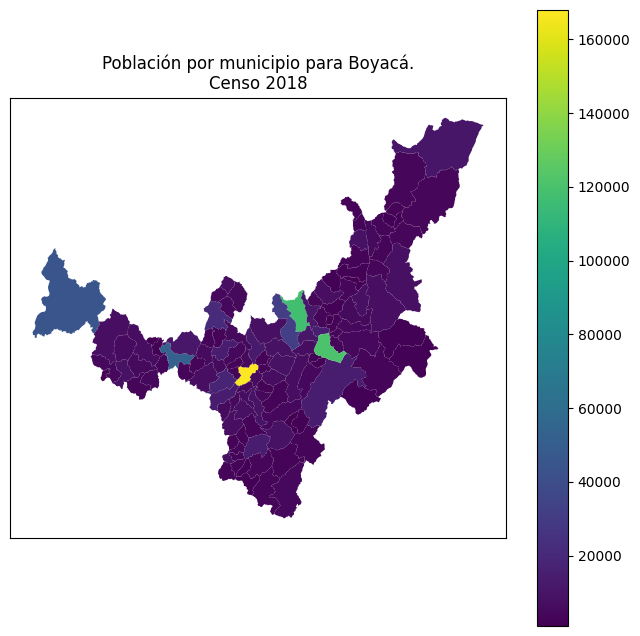

In [ ]:
mpio_filtrado = mpio_gdf_cuidado.loc[mpio_gdf_cuidado["dpto_ccdgo"]=="15"]
dpto_nombre = mpio_filtrado["dpto_cnmbr"].unique()[0]

fig,ax = plt.subplots(figsize=(8,8))

mpio_filtrado.plot(ax=ax,column="N",legend=True)
ax.set_title(f"Población por municipio para {dpto_nombre.title()}.\nCenso 2018")

ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

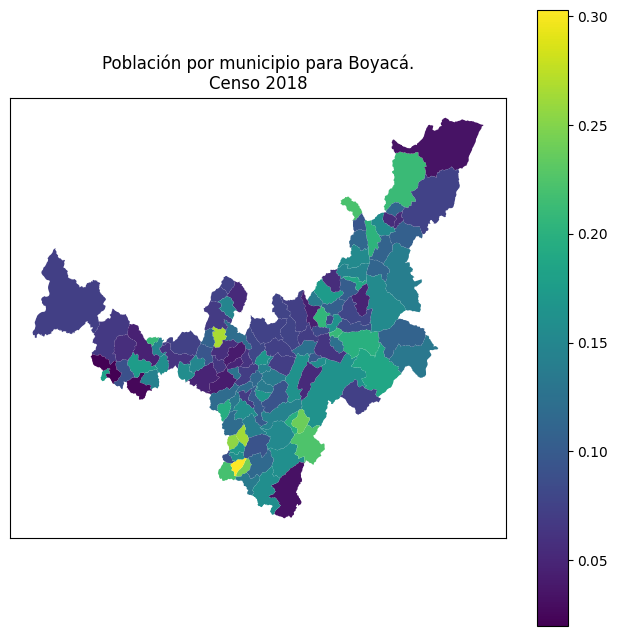

In [ ]:
mpio_filtrado = mpio_gdf_cuidado.loc[mpio_gdf_cuidado["dpto_ccdgo"]=="15"]
dpto_nombre = mpio_filtrado["dpto_cnmbr"].unique()[0]

fig,ax = plt.subplots(figsize=(8,8))

mpio_filtrado.plot(ax=ax,column="N_dificultad_per_cap",legend=True)
ax.set_title(f"Población por municipio para {dpto_nombre.title()}.\nCenso 2018")

ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()